# Some basic plots of attention patterns
The first results working with attention patterns over prompts.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from transformers import AutoTokenizer

from gptomics import functional as func
from gptomics import transformersio

# Head 8,1 (many high K composition values)

In [2]:
modelname = "EleutherAI/gpt-neo-125M"

In [3]:
small_prompt = "The quick brown fox jumped over the lazy"

In [6]:
att, fnout = func.attention_pattern(modelname, small_prompt, False)
attribution = func.total_attribution(modelname, small_prompt, False)

<class 'tuple'>
values is torch.Size([8, 64])
attn_mat is torch.Size([1, 12, 8, 8])
<class 'tuple'>
values is torch.Size([8, 64])
attn_mat is torch.Size([1, 12, 8, 8])
<class 'tuple'>
values is torch.Size([8, 64])
attn_mat is torch.Size([1, 12, 8, 8])
<class 'tuple'>
values is torch.Size([8, 64])
attn_mat is torch.Size([1, 12, 8, 8])
<class 'tuple'>
values is torch.Size([8, 64])
attn_mat is torch.Size([1, 12, 8, 8])
<class 'tuple'>
values is torch.Size([8, 64])
attn_mat is torch.Size([1, 12, 8, 8])
<class 'tuple'>
values is torch.Size([8, 64])
attn_mat is torch.Size([1, 12, 8, 8])
<class 'tuple'>
values is torch.Size([8, 64])
attn_mat is torch.Size([1, 12, 8, 8])
<class 'tuple'>
values is torch.Size([8, 64])
attn_mat is torch.Size([1, 12, 8, 8])
<class 'tuple'>
values is torch.Size([8, 64])
attn_mat is torch.Size([1, 12, 8, 8])
<class 'tuple'>
values is torch.Size([8, 64])
attn_mat is torch.Size([1, 12, 8, 8])
<class 'tuple'>
values is torch.Size([8, 64])
attn_mat is torch.Size([1, 12,

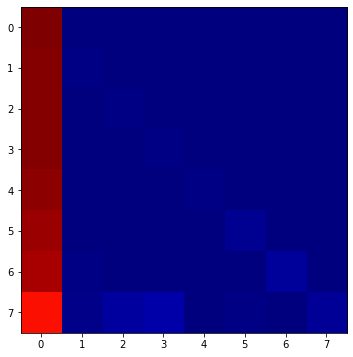

In [7]:
plt.figure(figsize=(7, 6))
plt.imshow(att[8][0, 1, :, :].data.cpu().numpy(), cmap="jet")

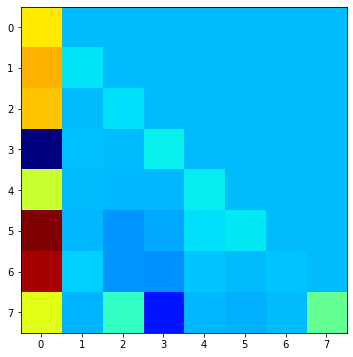

In [9]:
plt.figure(figsize=(7, 6))
plt.imshow(attribution[8,0].data.cpu().numpy().T, cmap="jet")

In [6]:
medium_prompt = (
    "We hold these truths to be self-evident, that all men are created equal,"
    " that they are endowed by their Creator with certain unalienable Rights,"
    " that among these are Life, Liberty and the pursuit of Happiness."
)

In [7]:
att, tokens = func.attention_pattern(modelname, medium_prompt)

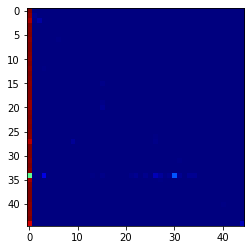

In [8]:
plt.imshow(att[8][0, 1, :, :].data.cpu().numpy(), cmap="jet")

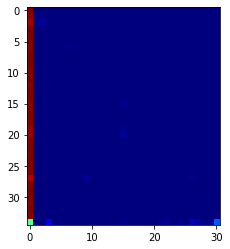

In [9]:
plt.imshow(att[8][0, 1, :35, :31].data.cpu().numpy(), cmap="jet")

In [10]:
tokens[34], tokens[30]

('Ġthese', 'ĠRights')

In [12]:
with open("../texts/potter") as f:
    long_prompt = f.read()[:-1]

In [16]:
att, tokens = func.attention_pattern(modelname, long_prompt, False)

In [17]:
attribution = func.total_attribution(modelname, long_prompt, False);

RuntimeError: [enforce fail at CPUAllocator.cpp:68] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 3307138967808 bytes. Error code 12 (Cannot allocate memory)

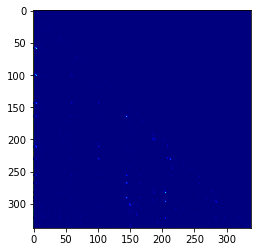

In [ ]:
plt.imshow(att[8][0, 1, :, :].data.cpu().numpy(), cmap="jet")

In [ ]:

plt.figure(figsize=(7, 6))
plt.imshow(attribution[8,0].data.cpu().numpy().T, cmap="jet")

In [14]:
att_ = att[8][0, 1, :, :].data.cpu().numpy().copy()
for i in range(att_.shape[0]):
    att_[i, i] = 0
    att_[:, 0] = 0
np.unravel_index(np.argmax(att_), att_.shape)

(59, 5)

In [15]:
# got tired of typing this
att_np = att[8][0, 1, ...].data.cpu().numpy().copy()

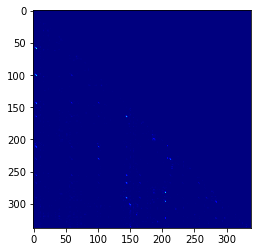

In [16]:
plt.imshow(att_, cmap="jet")

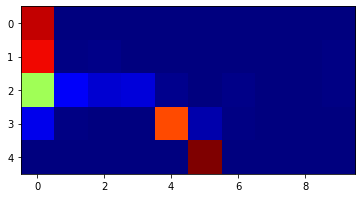

In [17]:
plt.imshow(att[8][0, 1, 55:60, :10].data.cpu().numpy(), cmap="jet")

In [18]:
tokens[58:60], tokens[4:6]

(['ĠD', 'urs'], ['urs', 'ley'])

In [19]:
Ds = [i for i in range(len(tokens)) if tokens[i] == tokens[58]]
urss = [i for i in range(len(tokens)) if tokens[i] == tokens[59]]

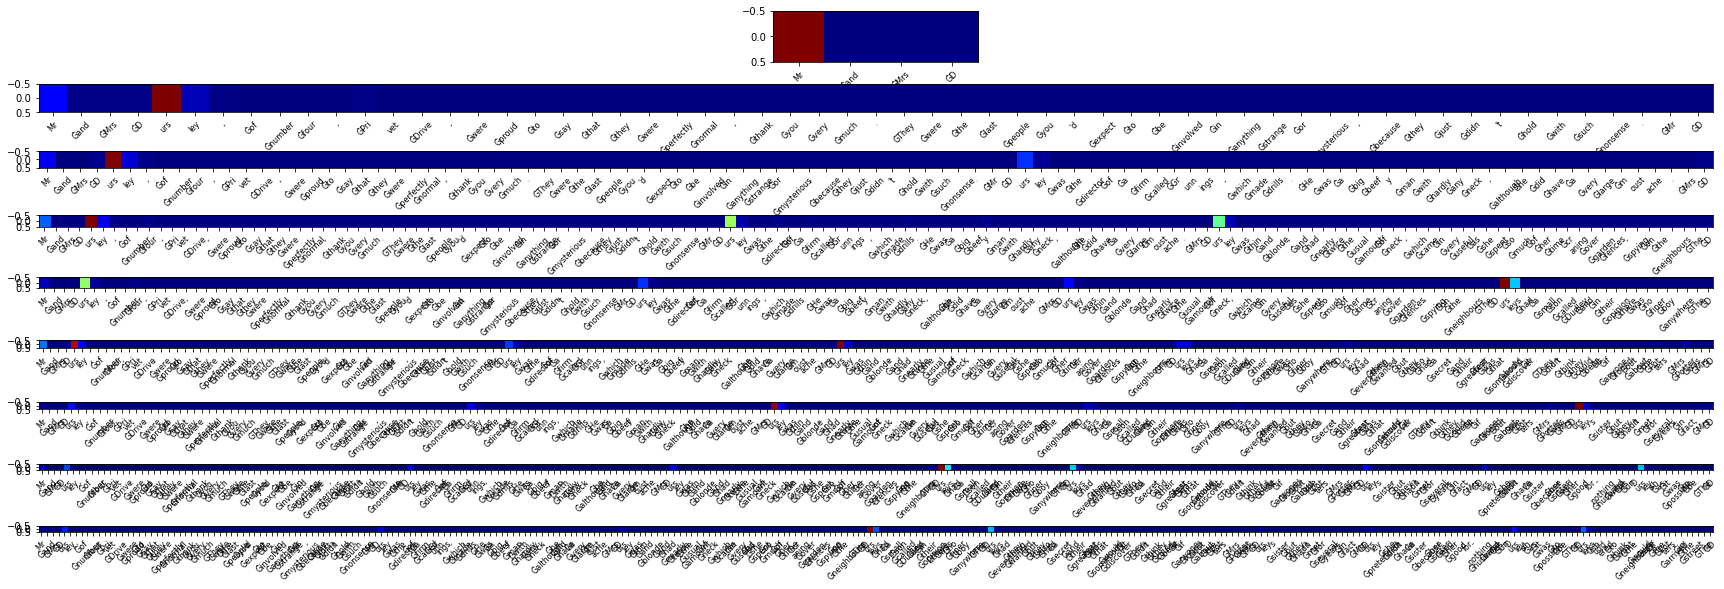

In [20]:
plt.figure(figsize=(30, 10), facecolor="white")

for i, d in enumerate(Ds):
    plt.subplot(len(Ds), 1, i+1)
    plt.imshow(att_np[d:d+1, :d+1], cmap="jet")
    plt.xticks(range(d+1), tokens[:d+1], rotation=45, fontsize=8)
    
plt.show()

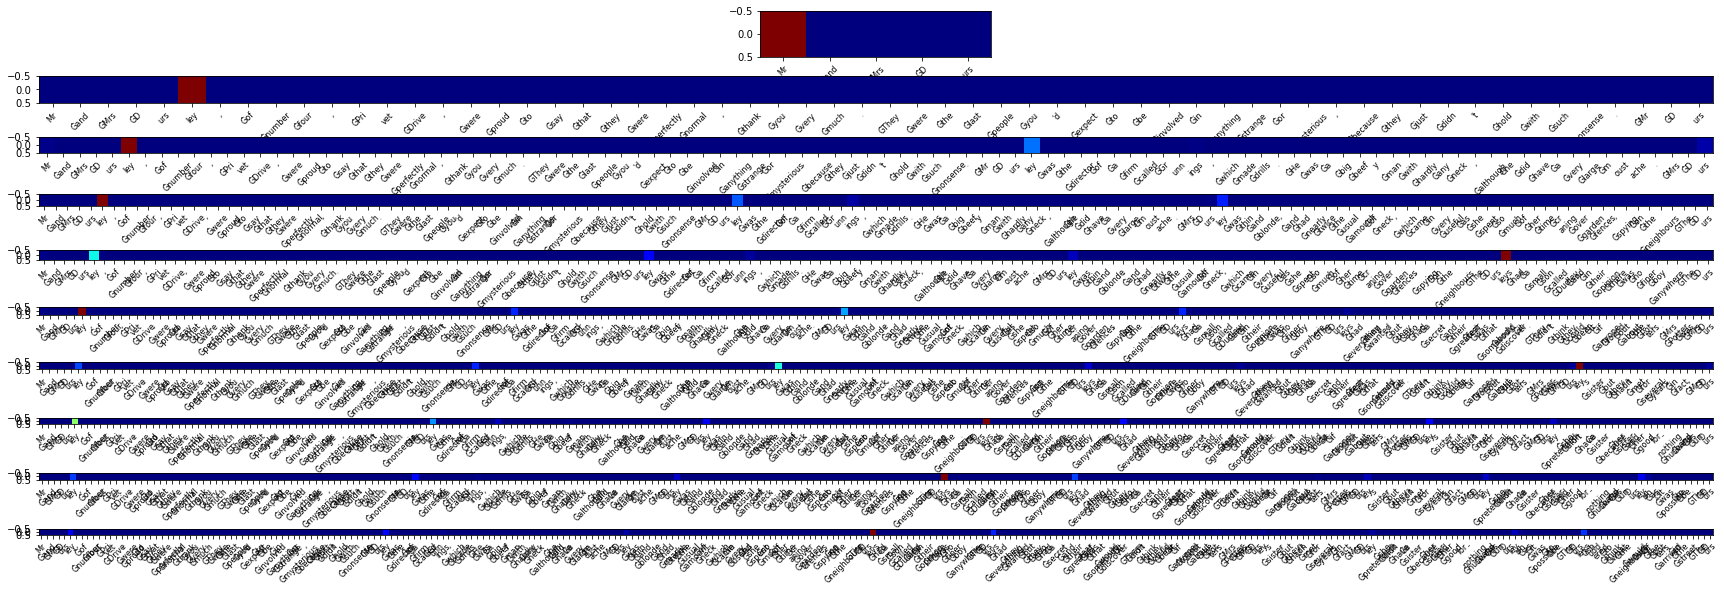

In [21]:
plt.figure(figsize=(30, 10), facecolor="white")

for i, d in enumerate(urss):
    plt.subplot(len(urss), 1, i+1)
    plt.imshow(att_np[d:d+1, :d+1], cmap="jet")
    plt.xticks(range(d+1), tokens[:d+1], rotation=45, fontsize=8)
    
plt.show()

In [38]:
with open("../texts/lotr") as f:
    long_prompt = f.read()[:-1]

In [39]:
att, tokens = func.attention_pattern(modelname, long_prompt)

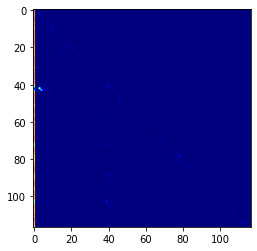

In [40]:
plt.imshow(att[8][0, 1, :, :].data.cpu().numpy(), cmap="jet")

In [41]:
att_ = att[8][0, 1, :, :].data.cpu().numpy().copy()
for i in range(att_.shape[0]):
    att_[i, i] = 0
    att_[:, 0] = 0
np.unravel_index(np.argmax(att_), att_.shape)

(42, 3)

In [42]:
# got tired of typing this
att_np = att[8][0, 1, ...].data.cpu().numpy().copy()

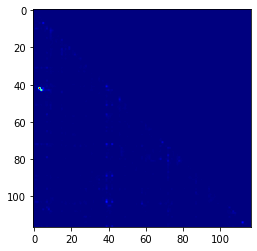

In [43]:
plt.imshow(att_, cmap="jet")

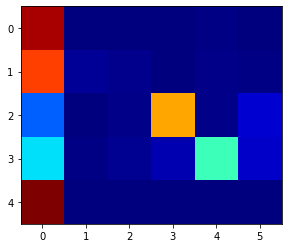

In [46]:
plt.imshow(att[8][0, 1, 40:45, :6].data.cpu().numpy(), cmap="jet")

In [55]:
tokens[42:44], tokens[3:5]

(['ĠBil', 'bo'], ['bo', 'ĠBagg'])

In [48]:
Bils = [i for i in range(len(tokens)) if tokens[i] == tokens[42]]
bos = [i for i in range(len(tokens)) if tokens[i] == tokens[43]]

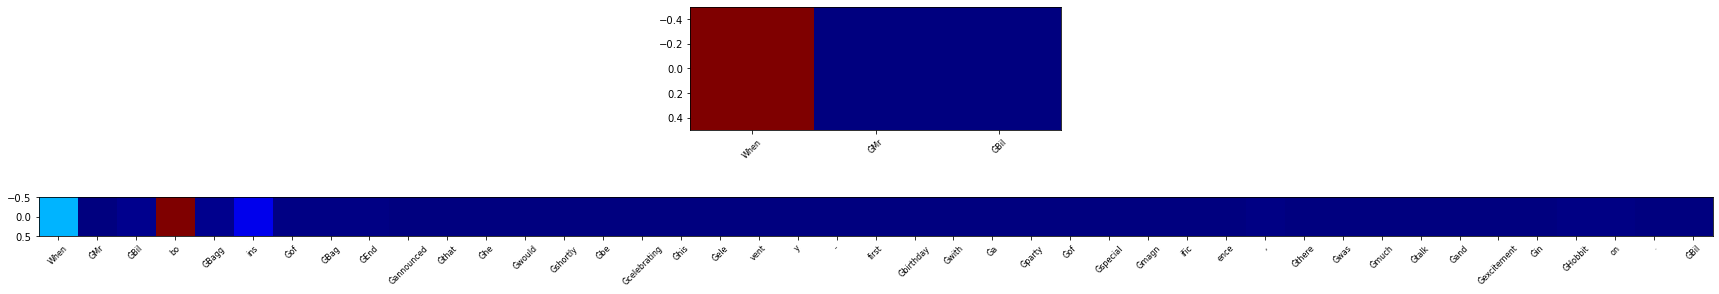

In [52]:
plt.figure(figsize=(30, 5), facecolor="white")

for i, d in enumerate(Bils):
    plt.subplot(len(Bils), 1, i+1)
    plt.imshow(att_np[d:d+1, :d+1], cmap="jet")
    plt.xticks(range(d+1), tokens[:d+1], rotation=45, fontsize=8)
    
plt.show()

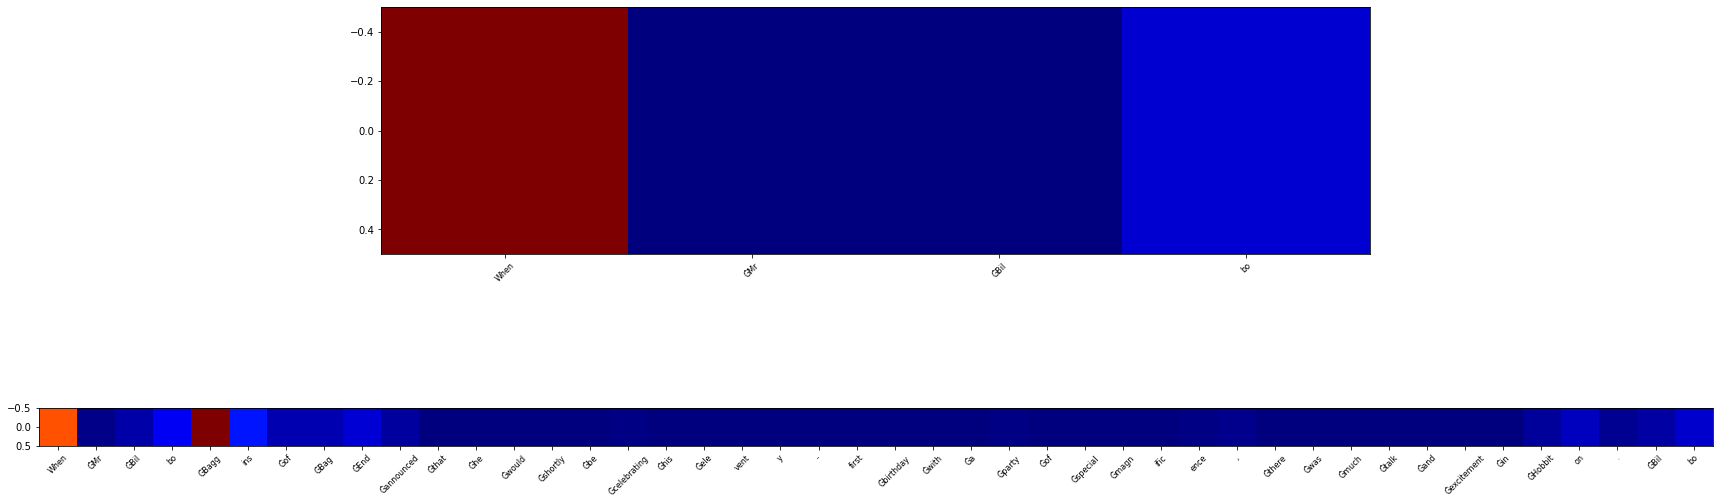

In [53]:
plt.figure(figsize=(30, 10), facecolor="white")

for i, d in enumerate(bos):
    plt.subplot(len(bos), 1, i+1)
    plt.imshow(att_np[d:d+1, :d+1], cmap="jet")
    plt.xticks(range(d+1), tokens[:d+1], rotation=45, fontsize=8)
    
plt.show()

# Head 7,1 (many high K composition values with the original denominator)

In [22]:
att_7_1 = att[7][0, 1, ...].data.cpu().numpy()

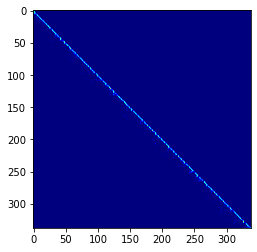

In [23]:
plt.imshow(att_7_1, cmap="jet")

In [24]:
att_ = att_7_1.copy()
for i in range(att_.shape[0]):
    att_[i, i] = 0
    att_[:, 0] = 0
np.unravel_index(np.argmax(att_), att_.shape)

(69, 68)

In [25]:
tokens[69], tokens[68]

('unn', 'ĠGr')

In [26]:
tokens[60:72]

['ley',
 'Ġwas',
 'Ġthe',
 'Ġdirector',
 'Ġof',
 'Ġa',
 'Ġfirm',
 'Ġcalled',
 'ĠGr',
 'unn',
 'ings',
 ',']

In [27]:
def plot_k_diag(k, lim=50):
    data = np.array(
        [att_7_1[i, i-k] for i in range(k, att_7_1.shape[0])]
    ).reshape(1, -1)

    plt.imshow(data[:, :lim], cmap="jet", vmin=0, vmax=1)
    plt.yticks([])
    plt.xticks(np.arange(lim), tokens[:lim], rotation=45)

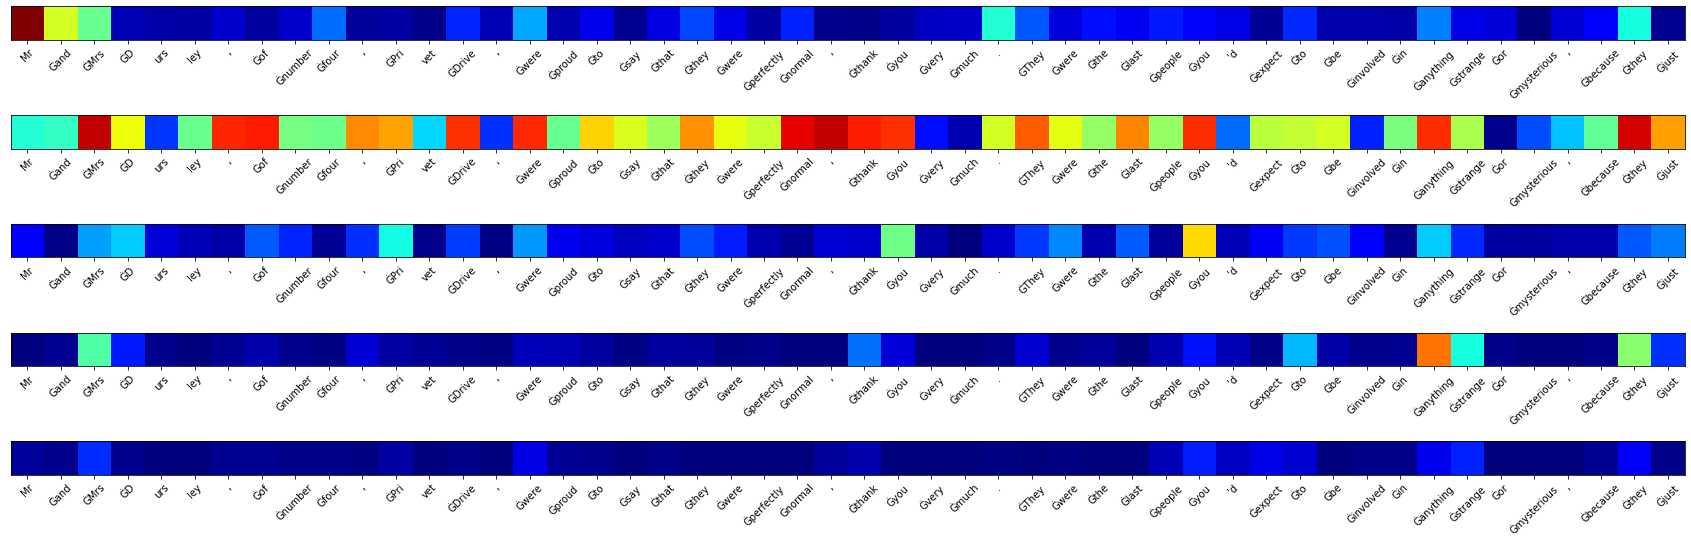

In [28]:
plt.figure(figsize=(30, 10))

for i in range(5):
    plt.subplot(5, 1, i+1)
    plot_k_diag(i, 50)
    
plt.subplots_adjust(
    #left=0., right=0.1, bottom=0., top=0.1,
    hspace=0., wspace=0.
)
plt.show()

Looks like a previous token head, but I'm not certain...

# Head 8,9 (many high Q composition values)

In [29]:
att_8_9 = att[8][0, 9, ...].data.cpu().numpy()

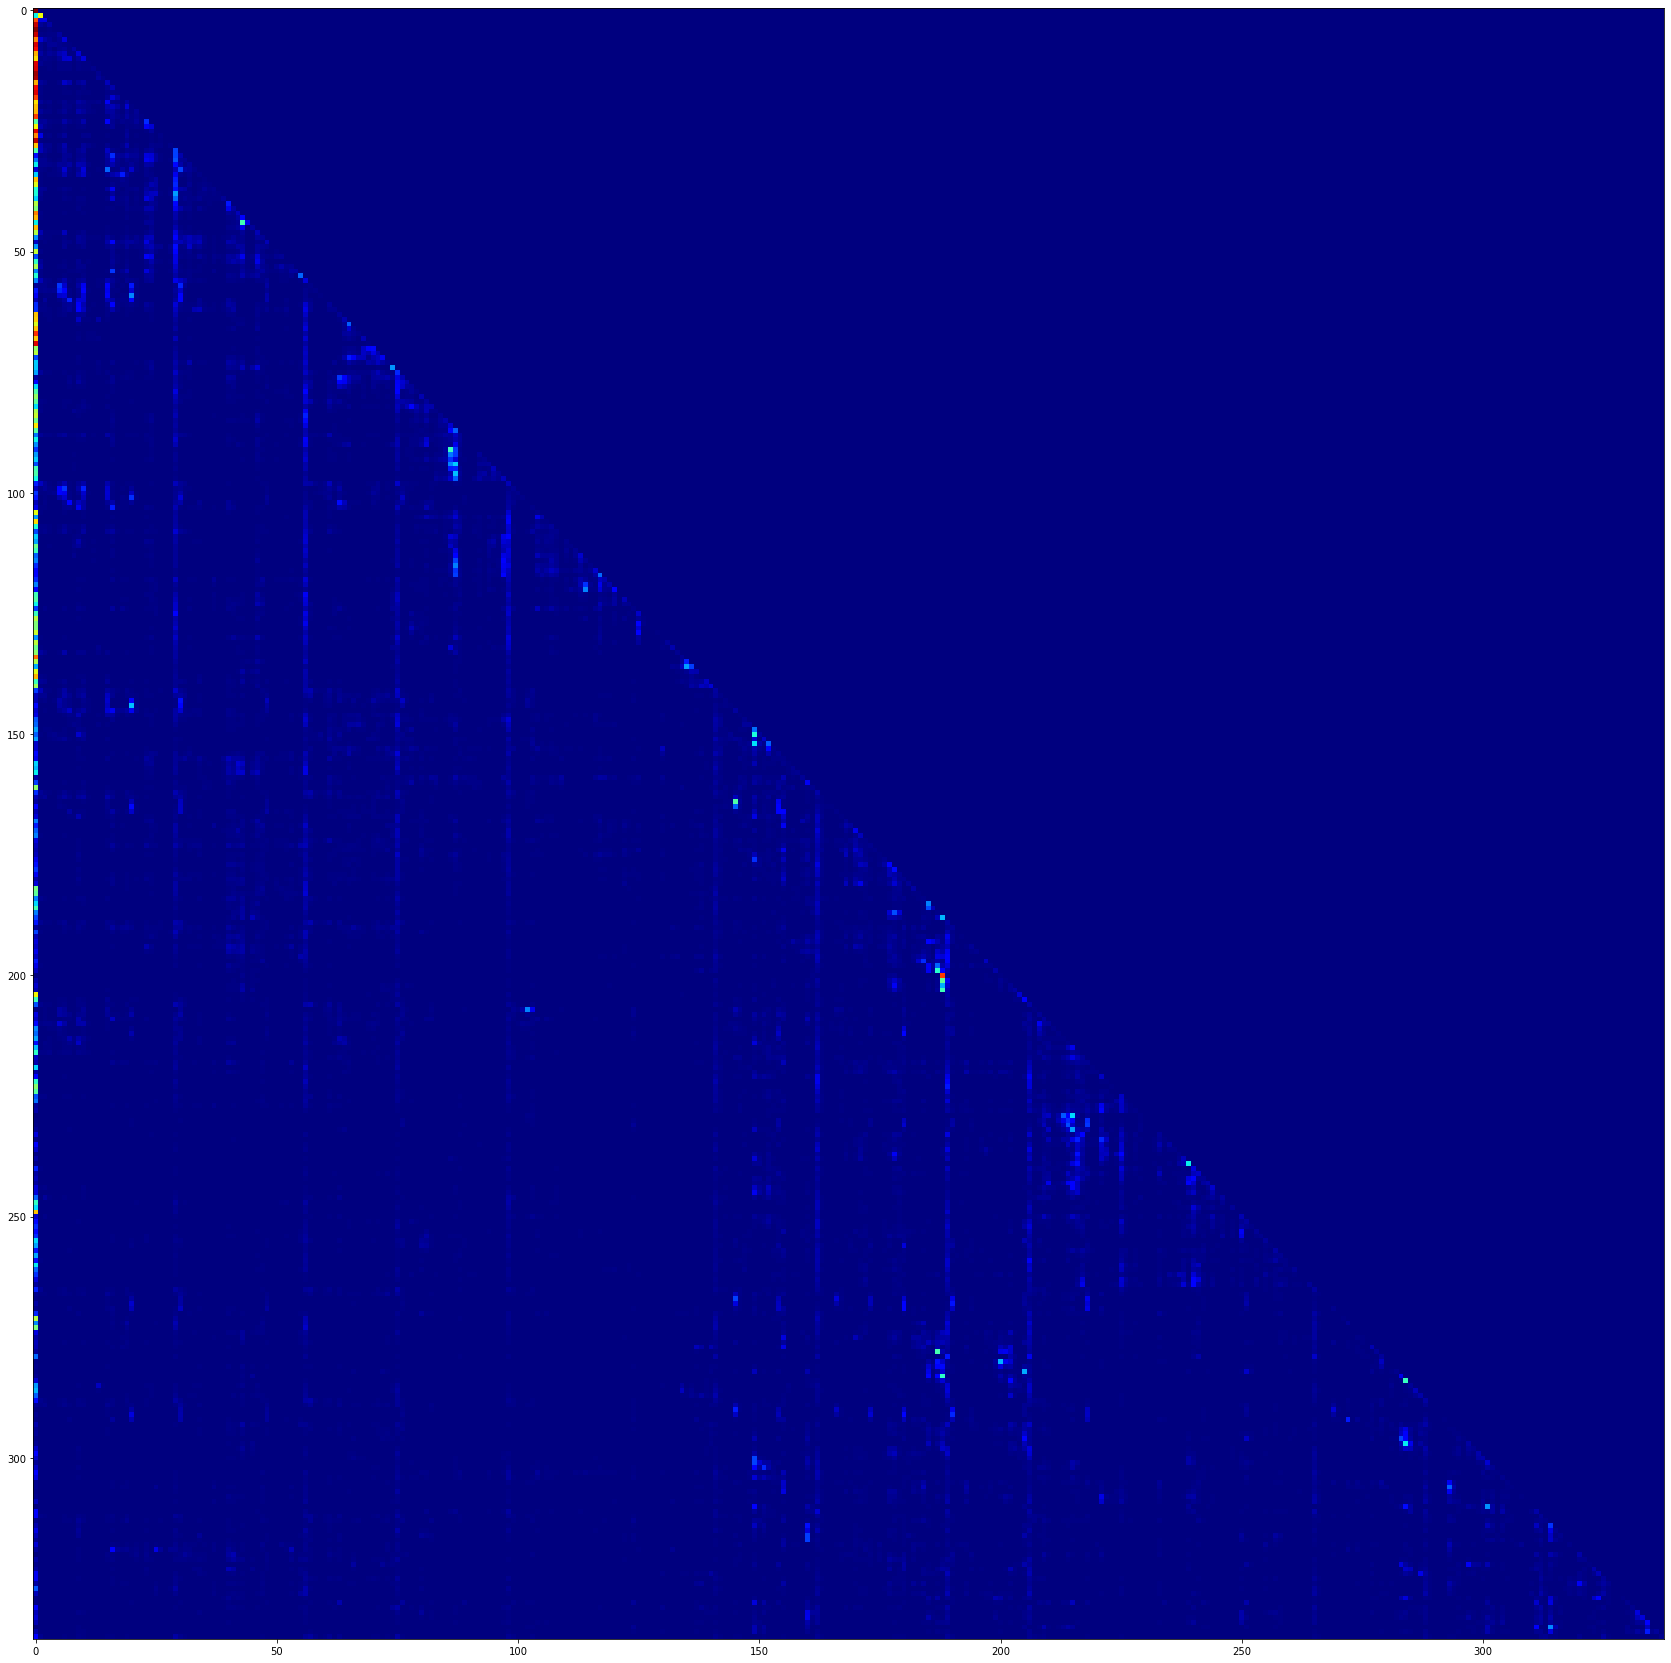

In [30]:
plt.figure(figsize=(30, 30))
plt.imshow(att_8_9, cmap="jet", vmin=0, vmax=1)
plt.show()

What are the lines? (some more inspection) ends of sentences?

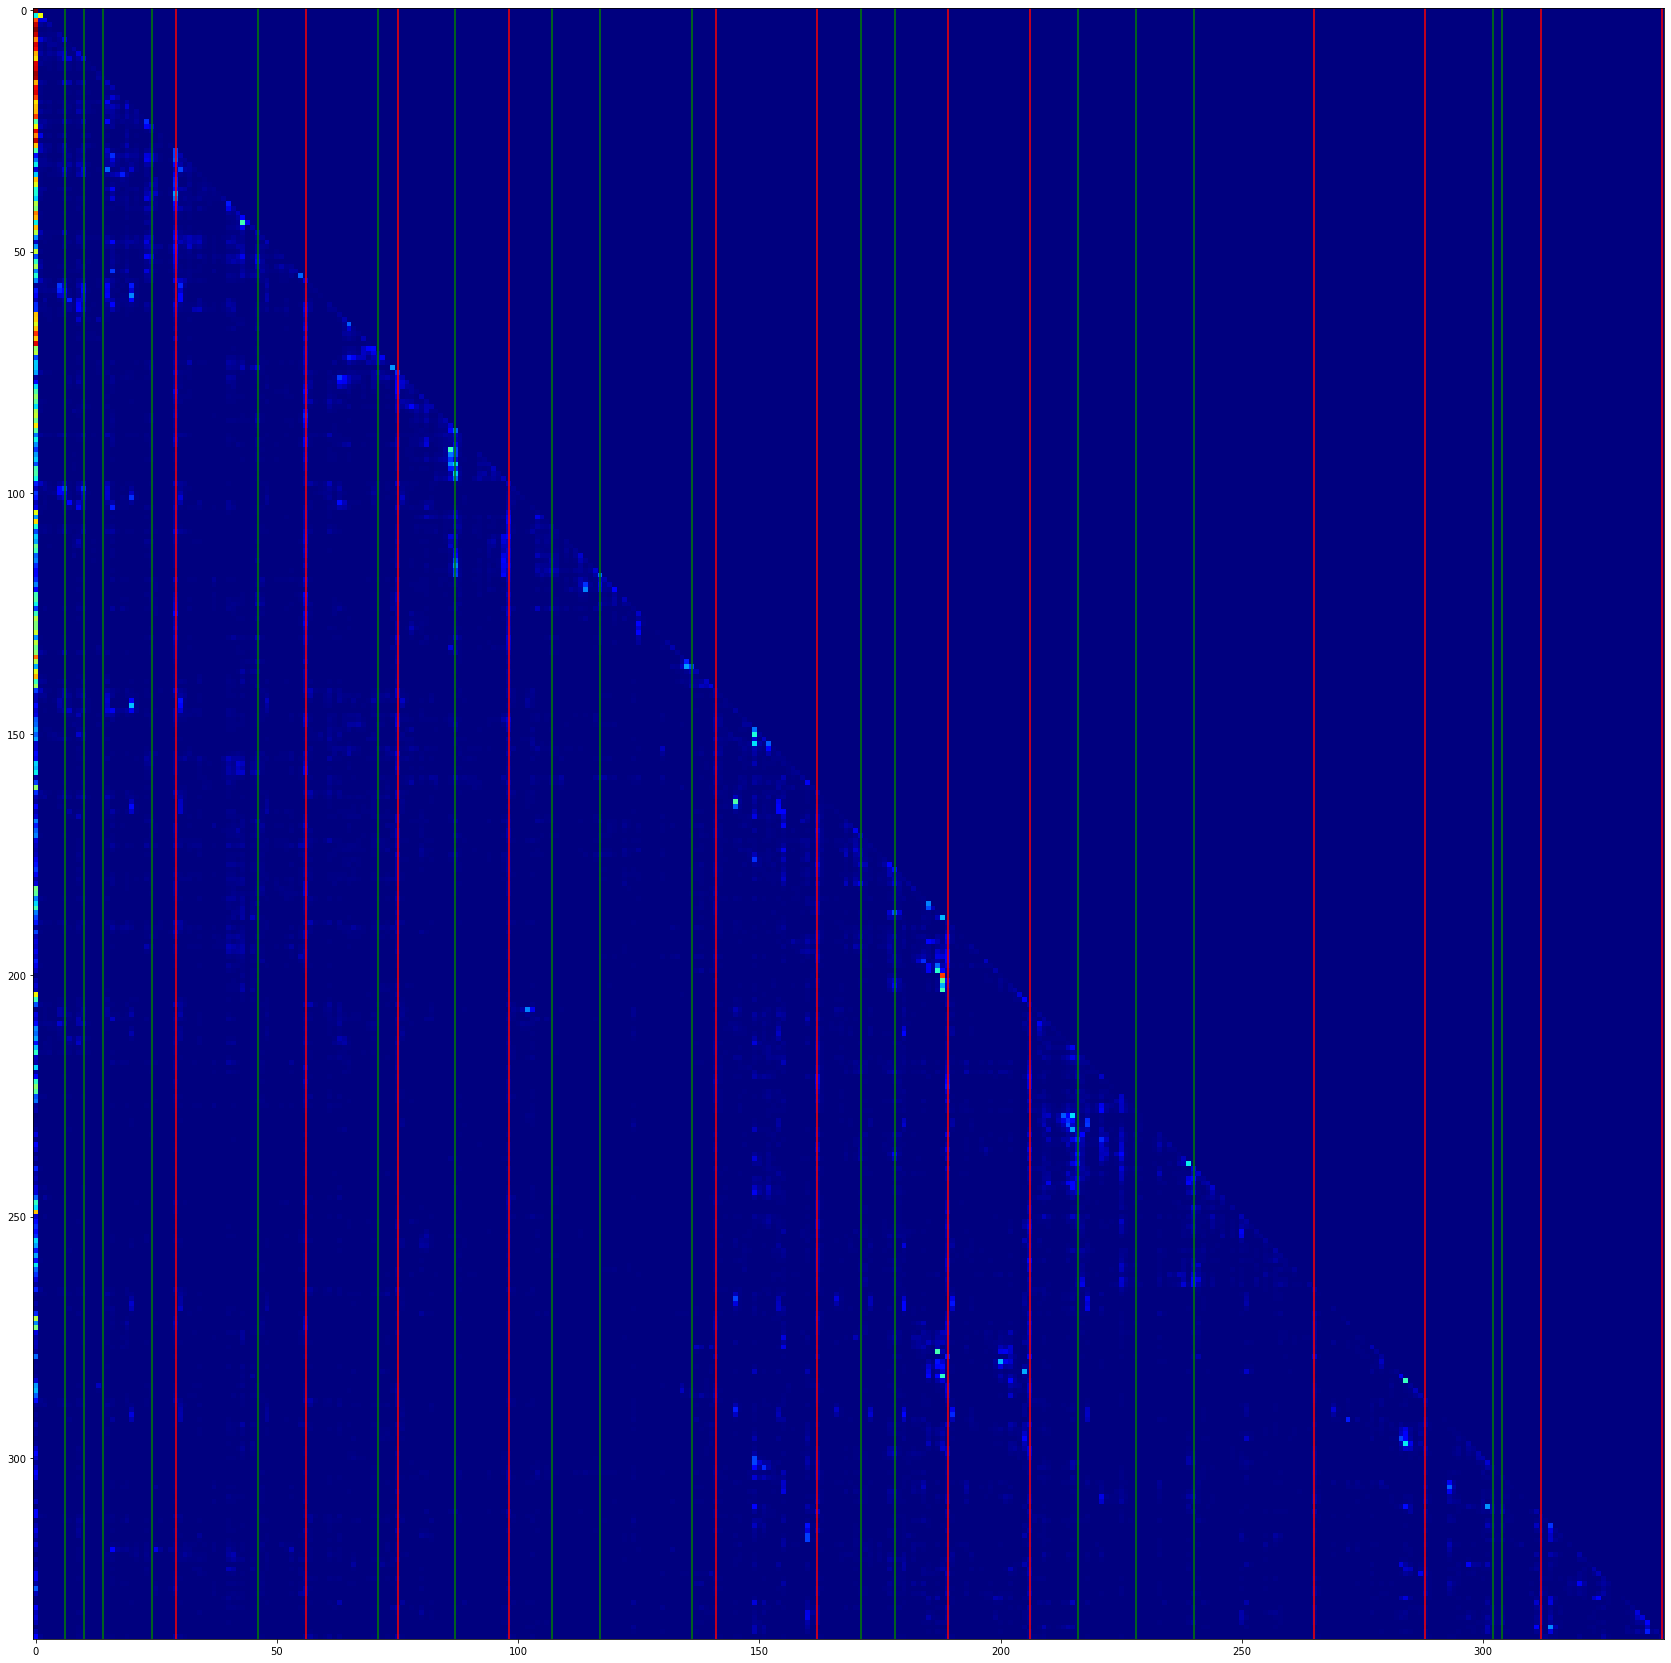

In [31]:
plt.figure(figsize=(30, 30))
plt.imshow(att_8_9, cmap="jet", vmin=0, vmax=1)

for (i, t) in enumerate(tokens):
    if t == ".":
        plt.axvline(i, color='r')
    elif t == ',':
        plt.axvline(i, color='g')

Yup

In [32]:
att_ = att_8_9.copy()
for i in range(att_.shape[0]):
    att_[i, i] = 0
    att_[:, 0] = 0
np.unravel_index(np.argmax(att_), att_.shape)

(200, 188)

In [33]:
tokens[200], tokens[188]

('Ġfound', 'Ġit')

In [34]:
tokens[30:50]

['ĠThey',
 'Ġwere',
 'Ġthe',
 'Ġlast',
 'Ġpeople',
 'Ġyou',
 "'d",
 'Ġexpect',
 'Ġto',
 'Ġbe',
 'Ġinvolved',
 'Ġin',
 'Ġanything',
 'Ġstrange',
 'Ġor',
 'Ġmysterious',
 ',',
 'Ġbecause',
 'Ġthey',
 'Ġjust']

In [35]:
tokens[230:250]

['ĠD',
 'urs',
 'ley',
 'Ġpretended',
 'Ġshe',
 'Ġdidn',
 "'t",
 'Ġhave',
 'Ġa',
 'Ġsister',
 ',',
 'Ġbecause',
 'Ġher',
 'Ġsister',
 'Ġand',
 'Ġher',
 'Ġgood',
 '-',
 'for',
 '-']

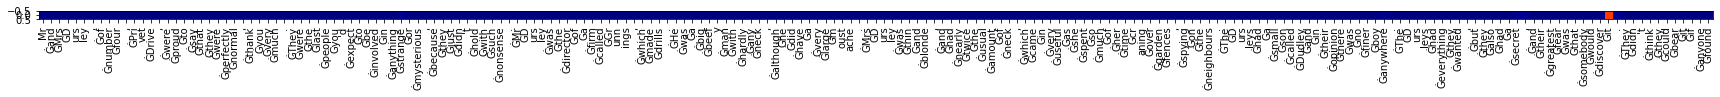

In [36]:
plt.figure(figsize=(30, 10))

i = 200

plt.imshow(att_8_9[i:i+1, :i+1], cmap="jet", vmin=0, vmax=1)
plt.xticks(np.arange(i+1), tokens[:i+1], rotation=90)
plt.show()

In [37]:
with open("../texts/potter") as f:
    long_prompt = f.read()[:-1]